In [1]:
import pandas as pd 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import glob
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [18]:
WIN = 'D:/'
MAC = '/Volumes/Transcend2/'

osp = MAC

## Determine appropriate RT window for JoinAligner

In [21]:
with open(osp+'pymz/mzmine/std_matches.txt', 'rb') as file:
    stds_matches = pickle.load(file)

In [23]:
rt_window = [ 0.01,0.05,0.08, 0.16, 0.3, 0.5, 0.66, 0.83, 1, 1.16, 1.3, 1.5, 1.66, 1.83, 2]
xml_template = os.path.join(osp,'git/pymzm/batch_files/align_from_mztab.xml')
output_dir = os.path.join(osp,'pymz/mzmine/221119/standards')
output_dir_changed_rt = os.path.join(osp, 'pymz/mzmine/221119/standards_changed_rt')

all1_files = ['Zik_Std1_1_23Oct18','Zik_Std1_2_23Oct18','Mal_Std1_1_20Dec16','Mal_Std1_2_20Dec16']
all2_files = ['Zik_Std2_1_23Oct18','Zik_Std2_2_23Oct18','Mal_Std2_1_20Dec16','Mal_Std2_2_20Dec16']
all3_files = ['Zik_Std3_1_23Oct18','Zik_Std3_2_23Oct18','Mal_Std3_1_20Dec16','Mal_Std3_2_20Dec16']

allvl1_files = ['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18','Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
allvl2_files = ['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18','Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
allvl3_files = ['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18','Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']

zik1_files = ['Zik_Std1_1_23Oct18','Zik_Std1_2_23Oct18']
zik2_files = ['Zik_Std2_1_23Oct18','Zik_Std2_2_23Oct18']
zik3_files = ['Zik_Std3_1_23Oct18','Zik_Std3_2_23Oct18']

mal1_files = ['Mal_Std1_1_20Dec16','Mal_Std1_2_20Dec16']
mal2_files = ['Mal_Std2_1_20Dec16','Mal_Std2_2_20Dec16']
mal3_files = ['Mal_Std3_1_20Dec16','Mal_Std3_2_20Dec16']

vl1_files = ['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18']
vl2_files = ['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18']
vl3_files = ['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18']

In [24]:
from metab_utils import get_total_stds
print(get_total_stds('Mal_Std1_1_20Dec16', stds_matches), get_total_stds('Mal_Std1_2_20Dec16', stds_matches))
print(get_total_stds('Mal_Std2_1_20Dec16', stds_matches), get_total_stds('Mal_Std2_2_20Dec16', stds_matches))
print(get_total_stds('Mal_Std3_1_20Dec16', stds_matches), get_total_stds('Mal_Std3_2_20Dec16', stds_matches))

print(get_total_stds('Zik_Std1_1_23Oct18', stds_matches), get_total_stds('Zik_Std1_2_23Oct18', stds_matches))
print(get_total_stds('Zik_Std2_1_23Oct18', stds_matches), get_total_stds('Zik_Std2_2_23Oct18', stds_matches))
print(get_total_stds('Zik_Std3_1_23Oct18', stds_matches), get_total_stds('Zik_Std3_2_23Oct18', stds_matches))

print(get_total_stds('VL_Std1_1_06Mar18', stds_matches), get_total_stds('VL_Std1_2_06Mar18', stds_matches))
print(get_total_stds('VL_Std2_1_06Mar18', stds_matches), get_total_stds('VL_Std2_2_06Mar18', stds_matches))
print(get_total_stds('VL_Std3_1_06Mar18', stds_matches), get_total_stds('VL_Std3_2_06Mar18', stds_matches))

47 37
46 44
13 14
38 38
42 34
10 11
32 35
40 38
12 12


In [26]:
from metab_utils import get_peaks_for_files
output_dir = os.path.join(osp, 'pymz/mzmine/221119/standards_alignment/')
zik_dict_peaks = get_peaks_for_files(output_dir+'zik_stds1', zik1_files, rt_window, xml_template, stds_matches)
zik2_dict_peaks = get_peaks_for_files(output_dir+'zik_stds2', zik2_files, rt_window, xml_template, stds_matches)
zik3_dict_peaks = get_peaks_for_files(output_dir+'zik_stds3', zik3_files, rt_window, xml_template, stds_matches)

['Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
0.01
['/Volumes/Transcend2/pymz/mzmine/221119/standards_alignment/zik_stds1/Zik_Std1_1_23Oct18_pp.mzTab', '/Volumes/Transcend2/pymz/mzmine/221119/standards_alignment/zik_stds1/Zik_Std1_2_23Oct18_pp.mzTab']
['/Volumes/Transcend2/pymz/mzmine/221119/standards_alignment/zik_stds1/align_quant.csv']
align not in list, probably ok!


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Transcend2/pymz/mzmine/221119/standards_alignment/zik_stds1/Zik_Std1_1_23Oct18_quant.csv'

In [84]:
mal_dict_peaks_before = get_peaks_for_files(output_dir+'mal_stds1', mal1_files, rt_window, xml_template, stds_matches)
mal2_dict_peaks_before = get_peaks_for_files(output_dir+'mal_stds2', mal2_files, rt_window, xml_template, stds_matches)
mal3_dict_peaks_before = get_peaks_for_files(output_dir+'mal_stds3', mal3_files, rt_window, xml_template, stds_matches)

['Mal_Std1_1_20Dec16', 'Mal_Std1_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Mal_Std2_1_20Dec16', 'Mal_Std2_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Mal_Std3_1_20Dec16', 'Mal_Std3_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [85]:
vl_dict_peaks_before = get_peaks_for_files(output_dir+'vl_stds1', vl1_files, rt_window, xml_template, stds_matches)
vl2_dict_peaks_before = get_peaks_for_files(output_dir+'vl_stds2', vl2_files, rt_window, xml_template, stds_matches)
vl3_dict_peaks_before = get_peaks_for_files(output_dir+'vl_stds3', vl3_files, rt_window, xml_template, stds_matches)

['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [92]:
mal_dict_peaks_after = get_peaks_for_files(output_dir+'mal_stds1_changed_rt', mal1_files, rt_window, xml_template, stds_matches)
mal2_dict_peaks_after = get_peaks_for_files(output_dir+'mal_stds2_changed_rt', mal2_files, rt_window, xml_template, stds_matches)
mal3_dict_peaks_after = get_peaks_for_files(output_dir+'mal_stds3_changed_rt', mal3_files, rt_window, xml_template, stds_matches)

['Mal_Std1_1_20Dec16', 'Mal_Std1_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Mal_Std2_1_20Dec16', 'Mal_Std2_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Mal_Std3_1_20Dec16', 'Mal_Std3_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [93]:
vl_dict_peaks_after = get_peaks_for_files(output_dir+'vl_stds1_changed_rt', vl1_files, rt_window, xml_template, stds_matches)
vl2_dict_peaks_after = get_peaks_for_files(output_dir+'vl_stds2_changed_rt', vl2_files, rt_window, xml_template, stds_matches)
vl3_dict_peaks_after = get_peaks_for_files(output_dir+'vl_stds3_changed_rt', vl3_files, rt_window, xml_template, stds_matches)

['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [94]:
combined_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_mal_1', all1_files, rt_window, xml_template, stds_matches)
combined2_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_mal_2', all2_files, rt_window, xml_template, stds_matches)
combined3_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_mal_3', all3_files, rt_window, xml_template, stds_matches)

['Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18', 'Mal_Std1_1_20Dec16', 'Mal_Std1_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18', 'Mal_Std2_1_20Dec16', 'Mal_Std2_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18', 'Mal_Std3_1_20Dec16', 'Mal_Std3_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [95]:
combined_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_mal_1_changed_rt', all1_files, rt_window, xml_template, stds_matches)
combined2_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_mal_2_changed_rt', all2_files, rt_window, xml_template, stds_matches)
combined3_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_mal_3_changed_rt', all3_files, rt_window, xml_template, stds_matches)

['Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18', 'Mal_Std1_1_20Dec16', 'Mal_Std1_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18', 'Mal_Std2_1_20Dec16', 'Mal_Std2_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18', 'Mal_Std3_1_20Dec16', 'Mal_Std3_2_20Dec16']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [96]:
combinedvl_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_vl_1', allvl1_files, rt_window, xml_template, stds_matches)
combinedvl2_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_vl_2', allvl2_files, rt_window, xml_template, stds_matches)
combinedvl3_dict_peaks_before = get_peaks_for_files(output_dir+'combined/zik_vl_3', allvl3_files, rt_window, xml_template, stds_matches)

['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18', 'Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18', 'Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18', 'Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [97]:
combinedvl_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_vl_1_changed_rt', allvl1_files, rt_window, xml_template, stds_matches)
combinedvl2_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_vl_2_changed_rt', allvl2_files, rt_window, xml_template, stds_matches)
combinedvl3_dict_peaks_after = get_peaks_for_files(output_dir+'combined/zik_vl_3_changed_rt', allvl3_files, rt_window, xml_template, stds_matches)

['VL_Std1_1_06Mar18', 'VL_Std1_2_06Mar18', 'Zik_Std1_1_23Oct18', 'Zik_Std1_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std2_1_06Mar18', 'VL_Std2_2_06Mar18', 'Zik_Std2_1_23Oct18', 'Zik_Std2_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2
['VL_Std3_1_06Mar18', 'VL_Std3_2_06Mar18', 'Zik_Std3_1_23Oct18', 'Zik_Std3_2_23Oct18']
0.01
0.05
0.08
0.16
0.3
0.5
0.66
0.83
1
1.16
1.3
1.5
1.66
1.83
2


In [98]:
combined1 = pd.DataFrame.from_dict(combined_dict_peaks_before).transpose()
combined2 = pd.DataFrame.from_dict(combined2_dict_peaks_before).transpose()
combined3 = pd.DataFrame.from_dict(combined3_dict_peaks_before).transpose()

In [99]:
combined1_after = pd.DataFrame.from_dict(combined_dict_peaks_after).transpose()
combined2_after = pd.DataFrame.from_dict(combined2_dict_peaks_after).transpose()
combined3_after = pd.DataFrame.from_dict(combined3_dict_peaks_after).transpose()

In [100]:
combinedvl1 = pd.DataFrame.from_dict(combinedvl_dict_peaks_before).transpose()
combinedvl2 = pd.DataFrame.from_dict(combinedvl2_dict_peaks_before).transpose()
combinedvl3 = pd.DataFrame.from_dict(combinedvl3_dict_peaks_before).transpose()

In [101]:
combinedvl1_after = pd.DataFrame.from_dict(combinedvl_dict_peaks_after).transpose()
combinedvl2_after = pd.DataFrame.from_dict(combinedvl2_dict_peaks_after).transpose()
combinedvl3_after = pd.DataFrame.from_dict(combinedvl3_dict_peaks_after).transpose()

In [102]:
zik1 = pd.DataFrame.from_dict(zik_dict_peaks).transpose()
zik2 = pd.DataFrame.from_dict(zik2_dict_peaks).transpose()
zik3 = pd.DataFrame.from_dict(zik3_dict_peaks).transpose()

In [103]:
vl1 = pd.DataFrame.from_dict(vl_dict_peaks_before).transpose()
vl1_after = pd.DataFrame.from_dict(vl_dict_peaks_after).transpose()
vl2 = pd.DataFrame.from_dict(vl2_dict_peaks_before).transpose()
vl2_after = pd.DataFrame.from_dict(vl2_dict_peaks_after).transpose()
vl3 = pd.DataFrame.from_dict(vl3_dict_peaks_before).transpose()
vl3_after = pd.DataFrame.from_dict(vl3_dict_peaks_after).transpose()

In [104]:
mal1 = pd.DataFrame.from_dict(mal_dict_peaks_before).transpose()
mal1_after = pd.DataFrame.from_dict(mal_dict_peaks_after).transpose()
mal2 = pd.DataFrame.from_dict(mal2_dict_peaks_before).transpose()
mal2_after = pd.DataFrame.from_dict(mal2_dict_peaks_after).transpose()
mal3 = pd.DataFrame.from_dict(mal3_dict_peaks_before).transpose()
mal3_after = pd.DataFrame.from_dict(mal3_dict_peaks_after).transpose()

In [105]:
combined = pd.concat([combined1,combined1_after,combined2, combined2_after, combined3,combined3_after ])
combined.columns = [rt*60 for rt in rt_window]
combined = combined.transpose()
combined.columns = ['Stds1', 'Stds1_Correction', 'Stds2', 'Stds2_Correction', 'Stds3', 'Stds3_Correction']

In [106]:
combinedvl = pd.concat([combinedvl1,combinedvl1_after,combinedvl2, combinedvl2_after, combinedvl3,combinedvl3_after ])
combinedvl.columns = [rt*60 for rt in rt_window]
combinedvl = combinedvl.transpose()
combinedvl.columns = ['Stds1', 'Stds1_Correction', 'Stds2', 'Stds2_Correction', 'Stds3', 'Stds3_Correction']

In [107]:
zik = pd.concat([zik1,zik2,zik3])
zik.columns = [rt*60 for rt in rt_window]
zik = zik.transpose()
zik.columns = ['Zik1', 'Zik2', 'Zik3']

In [108]:
mal = pd.concat([mal1,mal1_after,mal2,mal2_after,mal3, mal3_after])
mal.columns = [rt*60 for rt in rt_window]
mal = mal.transpose()
mal.columns = ['Mal1','Mal1_Correction', 'Mal2','Mal2_Correction', 'Mal3', 'Mal3_Correction']

In [109]:
vl = pd.concat([vl1,vl1_after,vl2,vl2_after,vl3, vl3_after])
vl.columns = [rt*60 for rt in rt_window]
vl = vl.transpose()
vl.columns = ['VL1','VL1_Correction', 'VL2','VL2_Correction', 'VL3', 'VL3_Correction']

In [174]:
mal

,Mal1,Mal1_Correction,Mal2,Mal2_Correction,Mal3,Mal3_Correction
0.6,"(7741, 13)","(7744, 13)","(8389, 9)","(8373, 9)","(7134, 2)","(7127, 2)"
3.0,"(6636, 32)","(6637, 32)","(7211, 24)","(7213, 24)","(6316, 6)","(6305, 6)"
4.8,"(6300, 36)","(6297, 36)","(6726, 35)","(6702, 35)","(5995, 8)","(5989, 8)"
9.6,"(6011, 37)","(6013, 37)","(6252, 39)","(6237, 39)","(5680, 8)","(5679, 8)"
18.0,"(5797, 37)","(5794, 37)","(6036, 40)","(6039, 40)","(5498, 8)","(5497, 8)"
30.0,"(5647, 37)","(5658, 37)","(5931, 40)","(5936, 40)","(5366, 9)","(5372, 9)"
39.6,"(5577, 37)","(5575, 37)","(5883, 40)","(5880, 40)","(5305, 9)","(5308, 9)"
49.8,"(5526, 37)","(5529, 37)","(5838, 40)","(5839, 40)","(5263, 9)","(5265, 9)"
60.0,"(5480, 37)","(5486, 37)","(5809, 40)","(5810, 40)","(5230, 9)","(5230, 9)"
69.6,"(5451, 37)","(5450, 37)","(5788, 40)","(5785, 40)","(5199, 9)","(5199, 9)"


In [111]:
zik

,Zik1,Zik2,Zik3
0.6,"(8496, 10)","(9457, 11)","(7638, 3)"
3.0,"(7162, 33)","(7796, 29)","(6692, 9)"
4.8,"(6678, 34)","(7336, 30)","(6399, 10)"
9.6,"(6281, 37)","(6989, 31)","(6120, 10)"
18.0,"(6072, 37)","(6790, 31)","(5912, 10)"
30.0,"(5952, 37)","(6657, 31)","(5783, 10)"
39.6,"(5906, 37)","(6610, 31)","(5740, 10)"
49.8,"(5868, 37)","(6559, 31)","(5695, 10)"
60.0,"(5840, 37)","(6525, 31)","(5653, 10)"
69.6,"(5809, 37)","(6482, 31)","(5622, 10)"


In [112]:
vl

,VL1,VL1_Correction,VL2,VL2_Correction,VL3,VL3_Correction
0.6,"(9649, 5)","(9554, 8)","(10509, 4)","(10346, 7)","(8312, 3)","(8239, 4)"
3.0,"(8472, 27)","(8224, 29)","(9151, 29)","(8793, 33)","(7467, 8)","(7256, 9)"
4.8,"(8011, 30)","(7839, 30)","(8562, 35)","(8307, 38)","(7106, 9)","(6914, 10)"
9.6,"(7600, 30)","(7529, 30)","(8019, 38)","(7907, 38)","(6667, 11)","(6579, 11)"
18.0,"(7402, 30)","(7372, 30)","(7776, 38)","(7740, 38)","(6436, 11)","(6386, 11)"
30.0,"(7283, 30)","(7256, 30)","(7646, 38)","(7622, 38)","(6309, 11)","(6277, 11)"
39.6,"(7227, 30)","(7196, 30)","(7582, 38)","(7559, 38)","(6260, 11)","(6220, 11)"
49.8,"(7167, 30)","(7148, 30)","(7530, 38)","(7513, 38)","(6211, 11)","(6172, 11)"
60.0,"(7120, 30)","(7077, 30)","(7498, 38)","(7474, 38)","(6163, 11)","(6143, 11)"
69.6,"(7085, 30)","(7033, 30)","(7465, 38)","(7434, 38)","(6120, 11)","(6104, 11)"


In [113]:
combined

,Stds1,Stds1_Correction,Stds2,Stds2_Correction,Stds3,Stds3_Correction
0.6,"(16190, 0)","(15431, 1)","(17784, 0)","(17091, 0)","(14717, 0)","(14358, 0)"
3.0,"(13614, 0)","(12078, 24)","(14776, 0)","(13324, 15)","(12825, 0)","(11909, 2)"
4.8,"(12703, 0)","(10959, 35)","(13738, 0)","(12084, 22)","(12115, 0)","(11043, 5)"
9.6,"(11775, 0)","(9863, 36)","(12630, 0)","(10792, 28)","(11242, 0)","(10042, 6)"
18.0,"(10426, 5)","(9229, 36)","(11101, 8)","(10121, 30)","(9993, 3)","(9332, 6)"
30.0,"(8900, 35)","(8809, 36)","(9792, 30)","(9716, 30)","(8941, 7)","(8842, 7)"
39.6,"(8644, 35)","(8604, 36)","(9557, 30)","(9525, 30)","(8693, 7)","(8644, 7)"
49.8,"(8467, 35)","(8443, 36)","(9378, 30)","(9349, 30)","(8499, 7)","(8465, 7)"
60.0,"(8319, 35)","(8310, 36)","(9236, 30)","(9231, 30)","(8345, 7)","(8328, 7)"
69.6,"(8195, 35)","(8189, 36)","(9124, 30)","(9122, 30)","(8226, 7)","(8213, 7)"


In [114]:
combinedvl

,Stds1,Stds1_Correction,Stds2,Stds2_Correction,Stds3,Stds3_Correction
0.6,"(18086, 0)","(17514, 0)","(19916, 0)","(19201, 0)","(15911, 0)","(15505, 0)"
3.0,"(15445, 0)","(14095, 9)","(16733, 0)","(15234, 5)","(13986, 0)","(13118, 3)"
4.8,"(14409, 0)","(12921, 11)","(15591, 0)","(13978, 13)","(13265, 0)","(12296, 5)"
9.6,"(13366, 0)","(11547, 24)","(14421, 0)","(12585, 20)","(12343, 1)","(11279, 5)"
18.0,"(12086, 2)","(10831, 26)","(12946, 4)","(11718, 22)","(11208, 4)","(10485, 9)"
30.0,"(11393, 3)","(10366, 30)","(12216, 4)","(11195, 24)","(10610, 5)","(10046, 9)"
39.6,"(11119, 4)","(10168, 30)","(11872, 6)","(10981, 24)","(10365, 5)","(9849, 9)"
49.8,"(10800, 4)","(9980, 30)","(11571, 7)","(10810, 24)","(10112, 5)","(9652, 9)"
60.0,"(10592, 4)","(9813, 30)","(11382, 8)","(10651, 24)","(9929, 5)","(9501, 9)"
69.6,"(10414, 5)","(9695, 30)","(11202, 8)","(10508, 24)","(9783, 5)","(9365, 9)"


## Plots of different RT windows

In [178]:
def plot_peaks_rt(dataframe, stds = True):
    yaxis = "Total number of peaks"
    p = 0
    if stds:
        p = 1
        yaxis = "Total number of standards"
    for n in range(0,6,2):
        s = [i[p] for i in np.array(dataframe.transpose().iloc[n])]
        s1 = [i[p] for i in np.array(dataframe.transpose().iloc[n+1])]
        plt.plot(rt_window,s)
        plt.plot(rt_window,s1)
        plt.ylabel(yaxis)
        plt.show()   
    

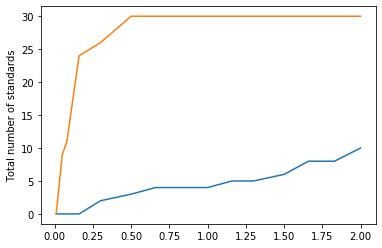

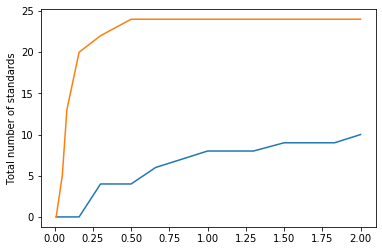

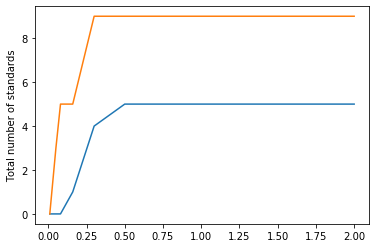

In [179]:
plot_peaks_rt(combinedvl)

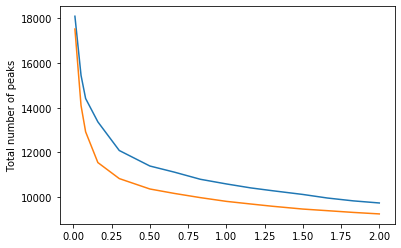

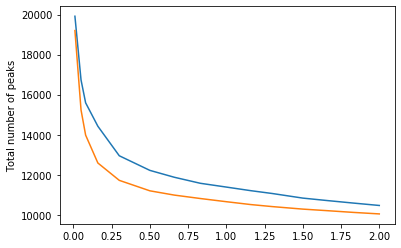

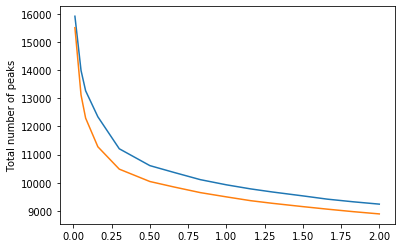

In [181]:
plot_peaks_rt(combinedvl, stds = False)

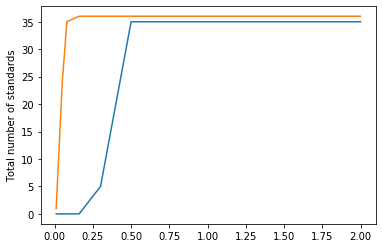

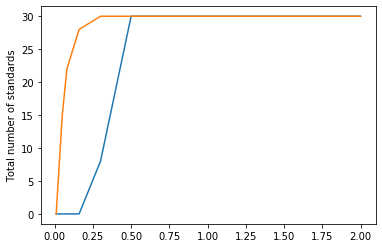

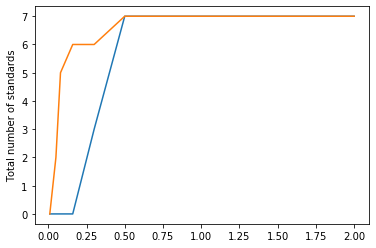

In [180]:
plot_peaks_rt(combined)

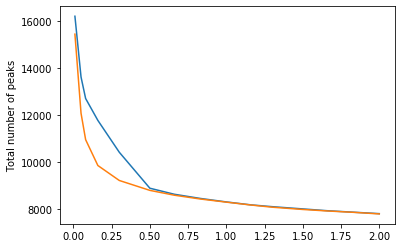

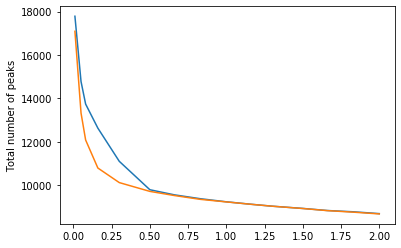

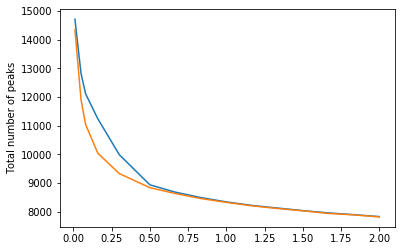

In [182]:
plot_peaks_rt(combined, False)